## 1. Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set(style='darkgrid', palette='pastel')

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

## 2. Load Dataset

In [2]:
data = 'apple_quality.csv'

df = pd.read_csv(data)
print(f'The shape dataset is {df.shape}')

The shape dataset is (4001, 9)


### **UNDERSTAND THE GIVEN VARIBLES**

**A_id:** This is likely an ID or unique identifier for each entry in the data. It could be used for referencing or identifying specific data points.

**Size:** This refers to the size or physical dimensions of the fruit. It's usually measured in specific units such as diameter or weight.

**Weight:** This refers to the weight of the fruit. It could also be measured in specific units such as grams or pounds.

**Sweetness:** This indicates the level of sweetness of the fruit, typically measured on a scale where higher values indicate sweeter fruit.

**Crunchiness:** This likely describes how crispy or firm the fruit is when bitten or chewed. It could be measured subjectively or using mechanical testing methods.

**Juiciness:** This indicates how much juice is present in the fruit. Highly juicy fruits might have high values here.

**Ripeness:** This indicates how ripe the fruit is. Very ripe fruits might have high values here.

**Acidity:** This refers to the level of acidity in the fruit. More acidic fruits would have higher values here.

**Quality:** This likely represents an overall assessment of the fruit's quality, possibly based on a combination of other attributes or subjective evaluations by testers or selectors.

## 3. Data Understanding

In [3]:
df.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


In [5]:
cats = [i for i in df.columns if df[i].dtypes == 'object']
nums = [i for i in df.columns if df[i].dtypes != 'object']

print('col of cats : ', cats)
print('==='*20)
print('col of nums :', nums)

col of cats :  ['Acidity', 'Quality']
col of nums : ['A_id', 'Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness']


In [6]:
df[cats].describe()

,Acidity,Quality
count,4001,4000
unique,4001,2
top,-0.491590483,good
freq,1,2004


In [7]:
df[nums].describe()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,1999.500000,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277
std,1154.844867,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427
min,0.000000,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599
25%,999.750000,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677
50%,1999.500000,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445
75%,2999.250000,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212
max,3999.000000,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837


## 4. Feature Engineering

In [8]:
df_new = df.drop('A_id', axis=1)
df_new.columns

Index(['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness',
       'Acidity', 'Quality'],
      dtype='object')

In [9]:
df_new.isnull().sum() * 100 / len(df_new)

Size           0.024994
Weight         0.024994
Sweetness      0.024994
Crunchiness    0.024994
Juiciness      0.024994
Ripeness       0.024994
Acidity        0.000000
Quality        0.024994
dtype: float64

In [10]:
means = df_new.mean()

df_new.fillna(means, inplace=True)

# check the null value after cleansing
df_new.isnull().sum() * 100 / len(df_new)

Size           0.000000
Weight         0.000000
Sweetness      0.000000
Crunchiness    0.000000
Juiciness      0.000000
Ripeness       0.000000
Acidity        0.000000
Quality        0.024994
dtype: float64

**The quality column is not filled with null values ​​because the data type is
 'object'**

In [11]:
df_new.tail(1)

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
4000,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277,Created_by_Nidula_Elgiriyewithana,NaN


In [12]:
df_new = df_new.drop(4000)

In [13]:
df_new.isnull().sum() * 100 / len(df_new)

Size           0.0
Weight         0.0
Sweetness      0.0
Crunchiness    0.0
Juiciness      0.0
Ripeness       0.0
Acidity        0.0
Quality        0.0
dtype: float64

**we have cleaned missing values ​​in the dataset**

In [14]:
df_new.duplicated().sum()

0

In [15]:
df_new['Acidity'] = df_new['Acidity'].astype('float64')
df_new.dtypes

Size           float64
Weight         float64
Sweetness      float64
Crunchiness    float64
Juiciness      float64
Ripeness       float64
Acidity        float64
Quality         object
dtype: object

## 5. Exploratory Data Analysis

In [16]:
nums_col = [i for i in df_new.columns if df_new[i].dtypes == 'float64']

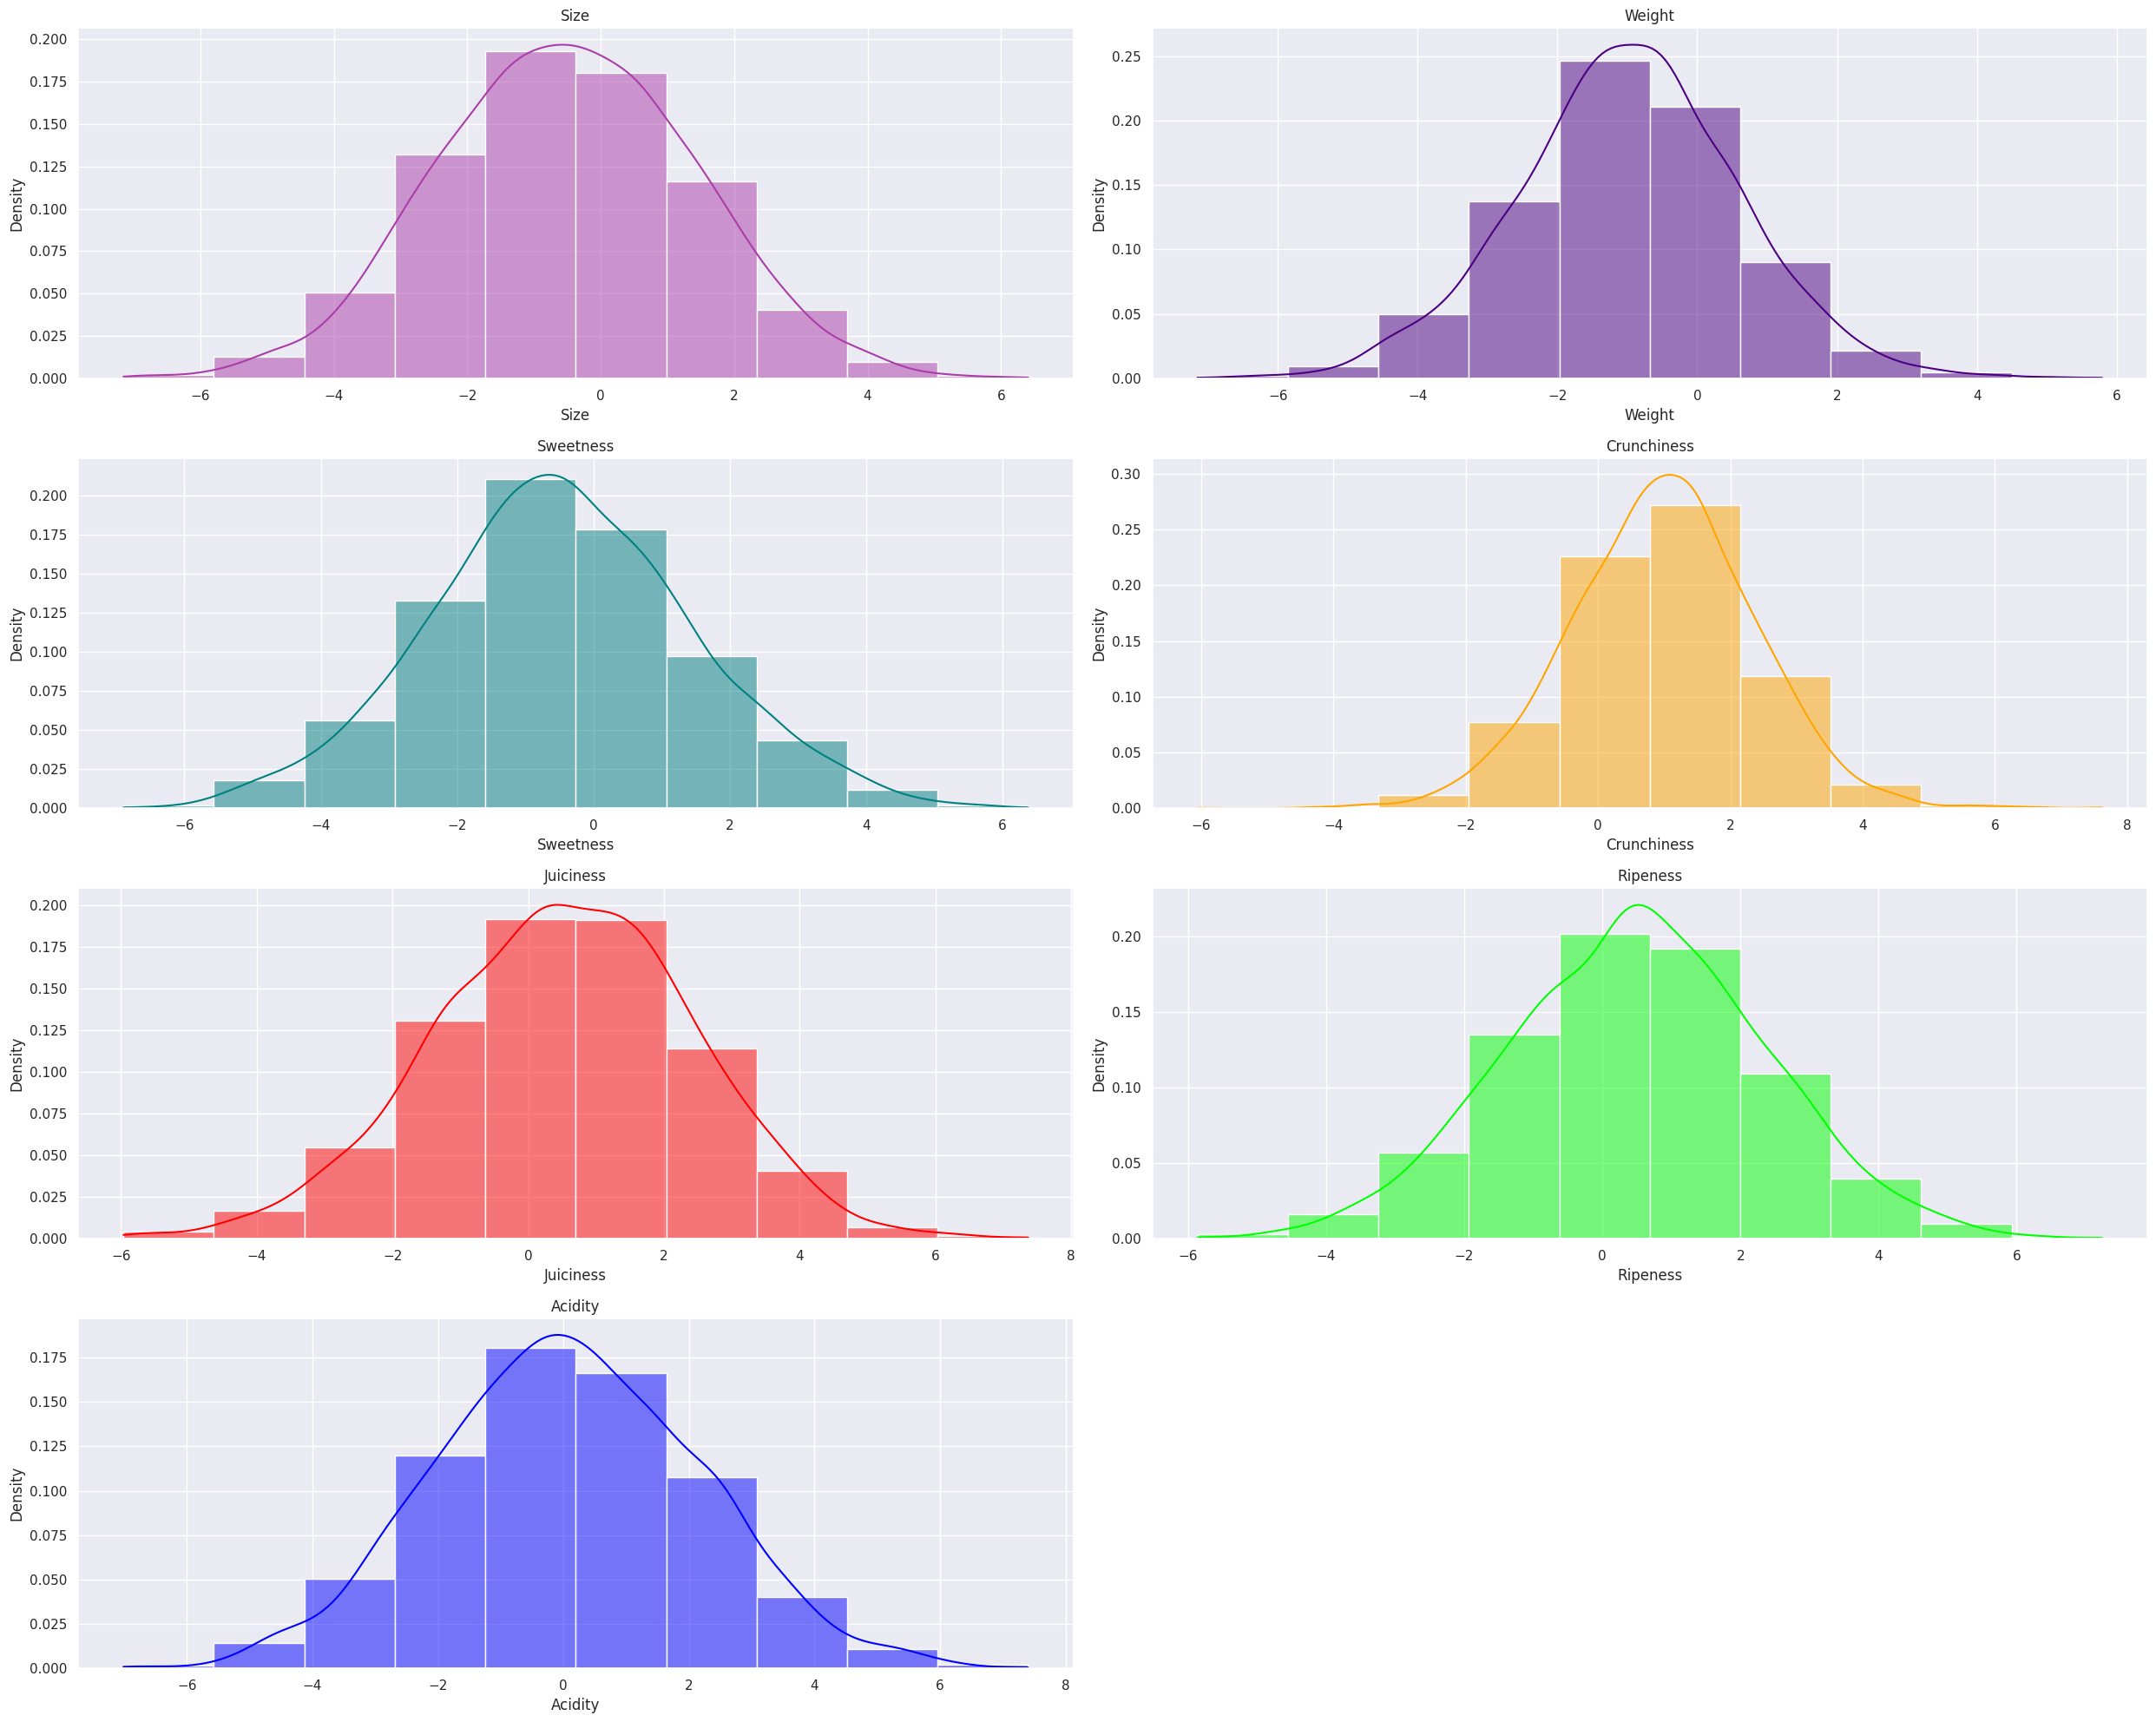

In [17]:
features = nums_col
colors = ['#ab3da9', '#4b0082', '#008080', '#ffa500', '#ff0000', '#00ff00', '#0000ff']

plt.figure(figsize=(25, 20))
for i in range(len(features)):
  plt.subplot(4, 2, i + 1)
  sns.histplot(data=df_new[features[i]], bins=10, kde=True, color=colors[i], stat='density')
  plt.title(features[i])
  plt.tight_layout()

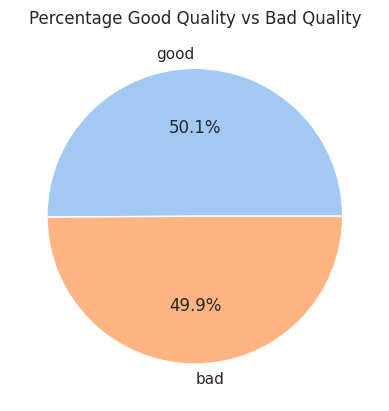

In [18]:
plt.pie(df_new['Quality'].value_counts(), labels=df_new['Quality'].unique(), autopct='%1.1f%%')
plt.title('Percentage Good Quality vs Bad Quality')
plt.show()

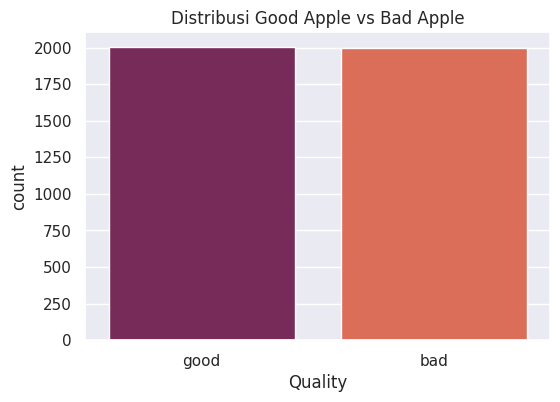

In [19]:
plt.figure(figsize=(6, 4))
sns.countplot(df_new, x='Quality', palette='rocket')
plt.title('Distribusi Good Apple vs Bad Apple')
plt.show()

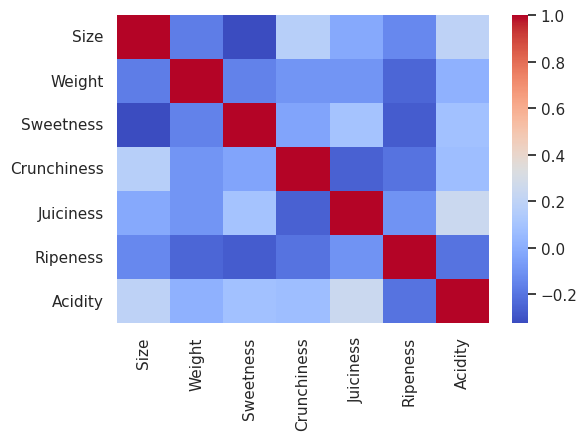

In [20]:
plt.figure(figsize=(6, 4))
sns.heatmap(df_new.corr(), annot=False, cmap='coolwarm', fmt=".2f")
plt.show()

## 6. Data Preprocessing

In [21]:
le = LabelEncoder()

df_new['Quality'] = le.fit_transform(df_new['Quality'])
df_new.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,1
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,1
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,0
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,1
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,1


Label:

1 = Good

0 = Bad

In [22]:
X = df_new.drop('Quality', axis=1)
y = df_new['Quality']

print('Shape X : ', X.shape)
print('Shape y : ', y.shape)

Shape X :  (4000, 7)
Shape y :  (4000,)


In [23]:
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

In [24]:
print("Data Setelah Transformasi:")
print(X)

Data Setelah Transformasi:
[[0.23466869 0.35837018 0.92248438 ... 0.58581883 0.47277002 0.45222503]
 [0.4393314  0.33310697 0.79570617 ... 0.51140848 0.51380745 0.43618517]
 [0.50594806 0.44809229 0.38856738 ... 0.6603883  0.44469332 0.66819226]
 ...
 [0.33317336 0.38727848 0.33566129 ... 0.61244349 0.81118186 0.39374394]
 [0.23186924 0.41501373 0.69791262 ... 0.60957147 0.4639662  0.3316495 ]
 [0.54803101 0.41994644 0.52871284 ... 0.54242922 0.38832684 0.59730634]]


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 7. Modelling & Evaluation

In [26]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
decision_tree_acc = accuracy_score(y_pred, y_test)

print(classification_report(y_test, y_pred))
print('Accuracy Model Decision Tree : {:.2f}%'.format(decision_tree_acc * 100))

              precision    recall  f1-score   support

           0       0.81      0.80      0.80       401
           1       0.80      0.81      0.81       399

    accuracy                           0.81       800
   macro avg       0.81      0.81      0.80       800
weighted avg       0.81      0.81      0.80       800

Accuracy Model Decision Tree : 80.50%


## 8. Testing

In [27]:
data_tes = pd.DataFrame({
    'Size': [1.52422],
    'Weight': [-2.1244],
    'Sweetness': [3.4277],
    'Crunchiness': [0.4241],
    'Juiciness': [-2.4255],
    'Ripeness': [3.5377],
    'Acidity': [0.2411]
})

data_tes

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
0,1.52422,-2.1244,3.4277,0.4241,-2.4255,3.5377,0.2411


In [28]:
scaled_datates = scaler.transform(data_tes)
tes_pred = clf.predict(scaled_datates)

print(f'Diagnosis Data Baru : {tes_pred}')

Diagnosis Data Baru : [1]
